In [230]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error

In [187]:
df = pd.read_csv('data/insurance.csv')

In [188]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [189]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [190]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [192]:
pd.DataFrame(df.isna().sum().sort_values(ascending=False))

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [193]:
df.dtypes[df.dtypes != 'object']

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

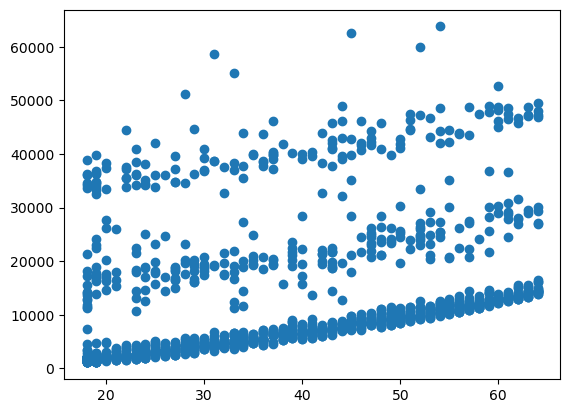

In [194]:
plt.scatter(data=df, x='age', y='charges')

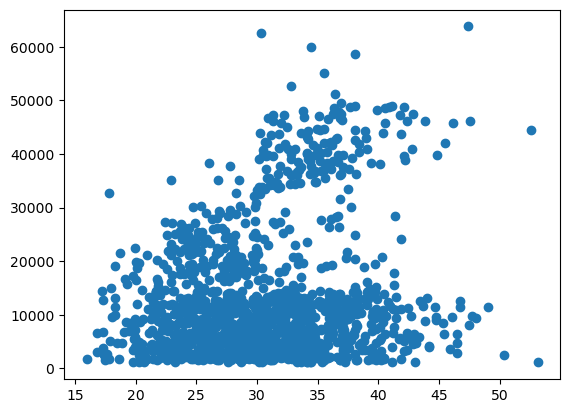

In [195]:
plt.scatter(data=df, x='bmi', y='charges')

In [196]:
df.query('bmi > 50 & charges < 10000')
#drop 847 and 1317

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1317,18,male,53.13,0,no,southeast,1163.4627


In [197]:
df.query('charges > 60000')
#drop 543, 1300

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


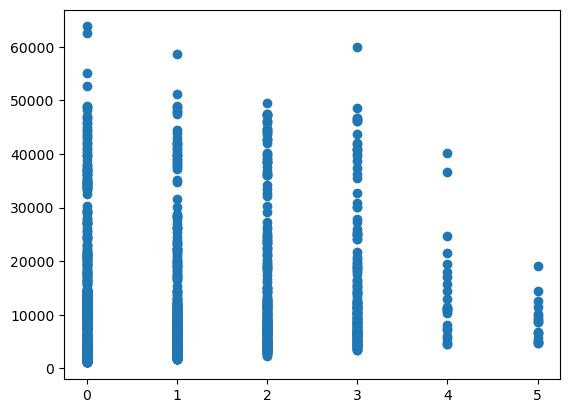

In [198]:
plt.scatter(data=df, x='children', y='charges')

In [199]:
df.query('children == 5')

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


In [200]:
pd.Series(stats.zscore(df['children'])).sort_values(ascending=False).head(20)

1272    3.240619
1130    3.240619
1116    3.240619
568     3.240619
1245    3.240619
877     3.240619
425     3.240619
413     3.240619
969     3.240619
1085    3.240619
937     3.240619
32      3.240619
984     3.240619
438     3.240619
932     3.240619
71      3.240619
640     3.240619
166     3.240619
165     2.410772
639     2.410772
dtype: float64

In [201]:
df = df.drop([847, 1317, 543, 1300])

In [202]:
df.dtypes[df.dtypes == 'object']

sex       object
smoker    object
region    object
dtype: object

In [203]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

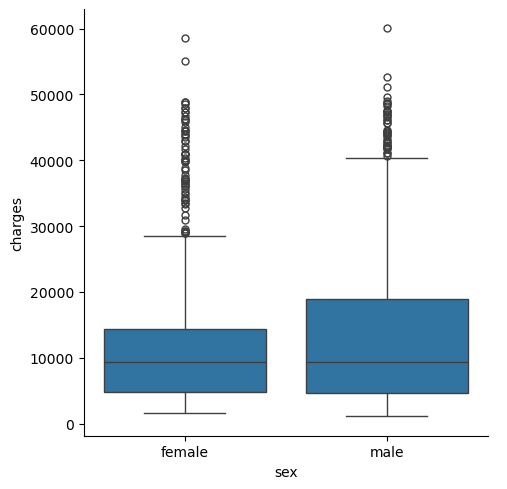

In [204]:
sns.catplot(data=df, x='sex', y='charges', kind='box')

In [205]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

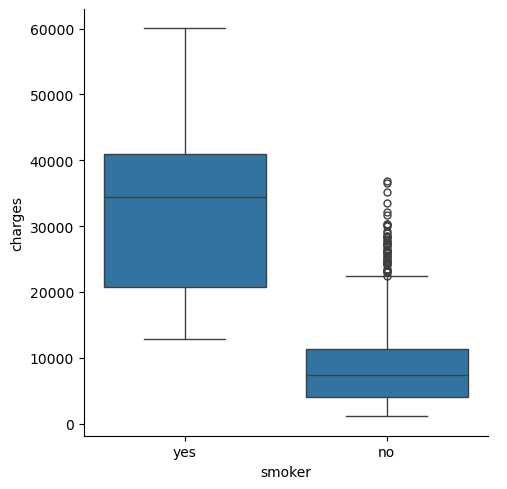

In [206]:
sns.catplot(data=df, x='smoker', y='charges', kind='box')

In [207]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

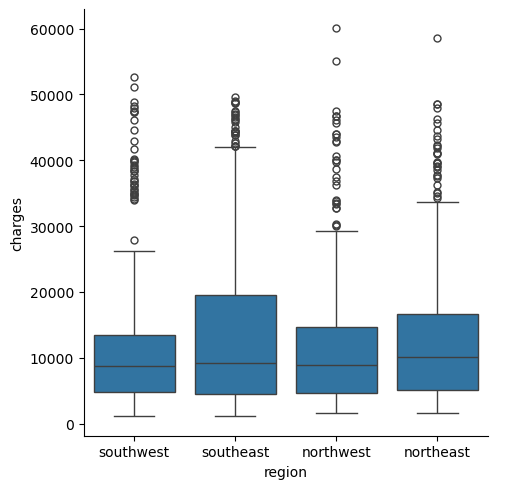

In [208]:
sns.catplot(data=df, x='region', y='charges', kind='box')

In [209]:
df.shape

(1334, 7)

<Axes: >

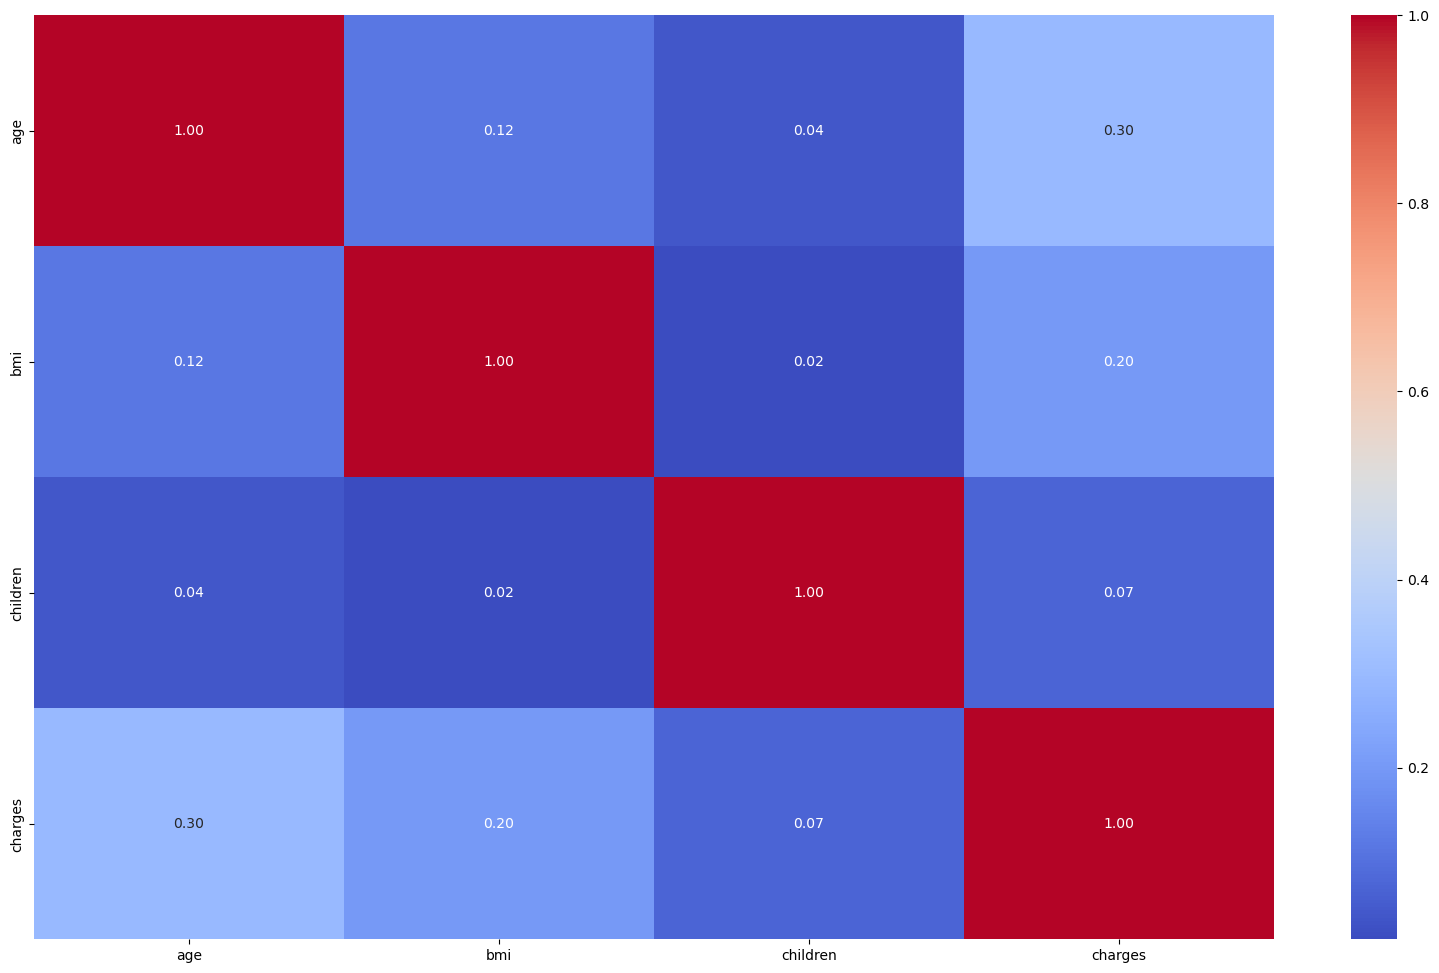

In [210]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

<Axes: xlabel='charges', ylabel='Count'>

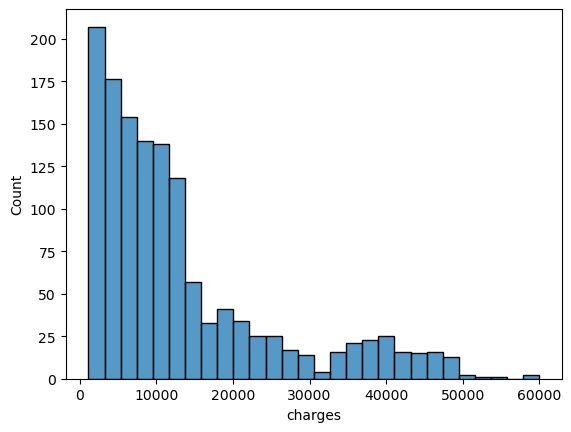

In [211]:
sns.histplot(data=df, x='charges')

In [212]:
df['charges'] = np.log1p(df['charges'])

<Axes: xlabel='charges', ylabel='Count'>

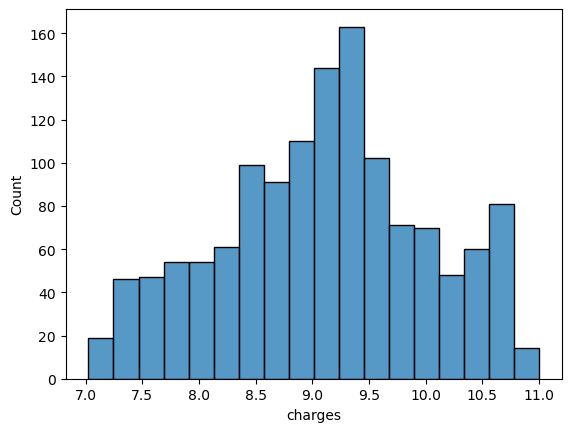

In [213]:
sns.histplot(data=df, x='charges')

In [214]:
df.dtypes[df.dtypes == 'object']

sex       object
smoker    object
region    object
dtype: object

In [215]:
df.dtypes[df.dtypes != 'object']

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

In [216]:
numbers = df.select_dtypes(include=['int64', 'float64']).columns
numbers = numbers.drop('charges')

In [217]:
ode_cols = ['sex', 'smoker']

In [218]:
ohe_cols = ['region']

In [219]:
num_pipeline = Pipeline([
    ('scale', StandardScaler())
])

In [220]:
ode_pipeline = Pipeline([
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [221]:
ohe_pipeline = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [222]:
col_transformer = ColumnTransformer([
    ('num_p', num_pipeline, numbers),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe', ohe_pipeline, ohe_cols)
],
remainder='passthrough',
n_jobs=-1
)

In [223]:
pipeline = Pipeline([
    ('preprocessing', col_transformer)
])

In [224]:
X = df.drop('charges', axis=1)
y = df['charges']

In [225]:
X_preprocessed = pipeline.fit_transform(X)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [227]:
lr = LinearRegression()

In [228]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [229]:
y_pred_lr = lr.predict(X_test)

In [231]:
mean_squared_error(y_test, y_pred_lr)

0.18810653760426121